# Normalize MLM urban land use into .csv tables

# Morelia Covers for years 2000 -> 2018 and 2018 -> 2021



In [1]:
import os
import sys  

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import importlib


root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.toc as toc
importlib.reload(toc)
crs_m = 'epsg:4326'


In [2]:
#Independent Spatial Variables

X_train = pd.read_csv("../locations/morelia/processed/Morelia_train_X.csv", header = 0)
Y_train = pd.read_csv("../locations/morelia/processed/Morelia_train_Y.csv", header = 0)

X_validation = pd.read_csv("../locations/morelia/processed/Morelia_validation_X.csv", header = 0)
Y_validation = pd.read_csv("../locations/morelia/processed/Morelia_validation_Y.csv", header = 0)

english_titles = ["Slope", "Distance to protected natural areas", "Distance to water shapes", "Distance to vegetation", "Distance to urban cover", "Distance to city center", "Distance to roads", "Travel time to center"]
units = ["Degrees", "Meters", "Meters","Meters","Meters","Meters","Meters", "Minutes"]

geometry = [Point(xy) for xy in zip(X_train["lat"], X_train["lon"])]
geodata_train_X = gpd.GeoDataFrame(X_train, crs = crs_m, geometry = geometry)

geometry = [Point(xy) for xy in zip(Y_train["lat"], Y_train["lon"])]
geodata_train_Y = gpd.GeoDataFrame(Y_train, crs = crs_m, geometry = geometry)

geometry = [Point(xy) for xy in zip(X_validation["lat"], X_validation["lon"])]
geodata_validation_X = gpd.GeoDataFrame(X_validation, crs = crs_m, geometry = geometry)

geometry = [Point(xy) for xy in zip(Y_validation["lat"], Y_validation["lon"])]
geodata_validation_Y = gpd.GeoDataFrame(Y_validation, crs = crs_m, geometry = geometry)


Y_tr = geodata_train_Y["incremento_urbano"]
Y_va = geodata_validation_Y["incremento_urbano"]

for i,c in enumerate(geodata_train_X.columns[3:-1]):
    
    rank_train = geodata_train_X[c]
    rank_valid = geodata_validation_X[c]
    

Graficando mapa: pendiente
Graficando mapa: dist_anps
Graficando mapa: dist_agua
Graficando mapa: dist_vegetacion
Graficando mapa: dist_urbano
Graficando mapa: dist_centro
Graficando mapa: dist_carreteras
Graficando mapa: costo


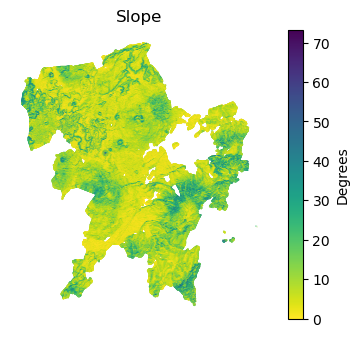

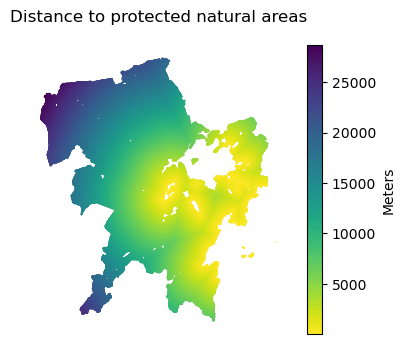

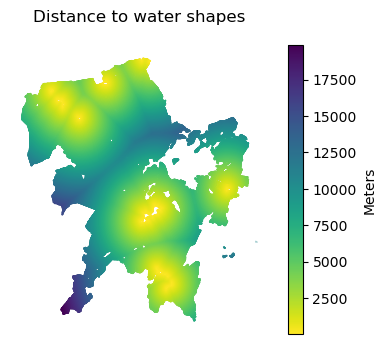

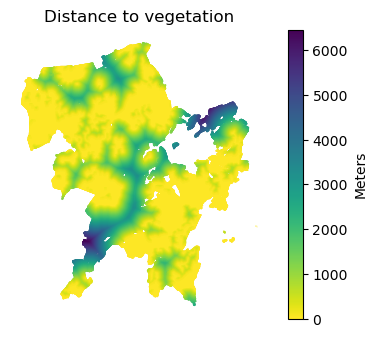

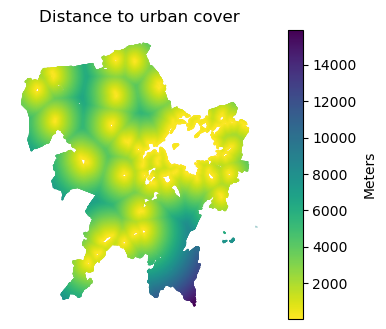

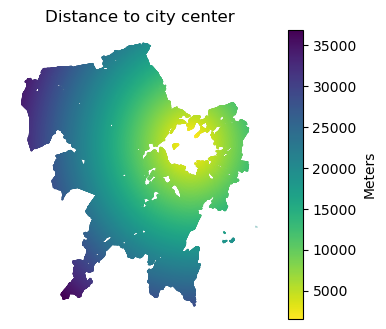

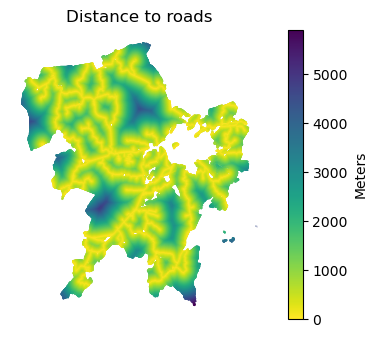

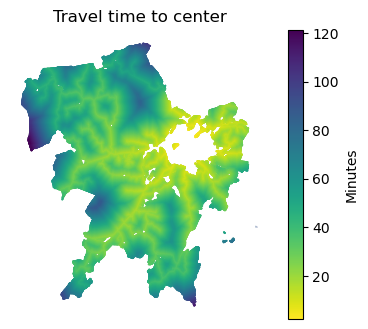

In [3]:


geometry = [Point(xy) for xy in zip(X_train["lat"], X_train["lon"])]
geodata_train_X = gpd.GeoDataFrame(X_train, crs = crs_m, geometry = geometry)

geometry = [Point(xy) for xy in zip(Y_train["lat"], Y_train["lon"])]
geodata_train_Y = gpd.GeoDataFrame(Y_train, crs = crs_m, geometry = geometry)


for i,c in enumerate(geodata_train_X.columns[3:-1]):
    
    print("Graficando mapa:", c)
    ax = geodata_train_X.plot(figsize=(20/4, 15/4), 
                              column = geodata_train_X[c], 
                              cmap = "viridis_r", 
                              legend = True, 
                              legend_kwds={"label": units[i]},
                              markersize = 0.01
                             )
    ax.set_axis_off();
    plt.title(english_titles[i])
    plt.plot()
    plt.savefig("figures_variable_contribution_analysis/Fig05_"+str(c)+"_.png",dpi = 150, format = "png", bbox_inches = "tight")

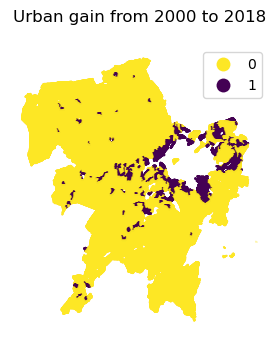

In [4]:
ax = geodata_train_Y.plot(
    figsize=(20/4, 15/4),
    column = geodata_train_Y["incremento_urbano"], 
    categorical = True, 
    cmap = "viridis_r", 
    legend = True, 
    markersize = 0.01
)
ax.set_axis_off();
plt.title("Urban gain from 2000 to 2018")
plt.plot()
plt.savefig("figures_variable_contribution_analysis/01_"+"Figure03_a_gain_2000_2018"+"_.png",dpi=150, format = "png", bbox_inches = "tight")

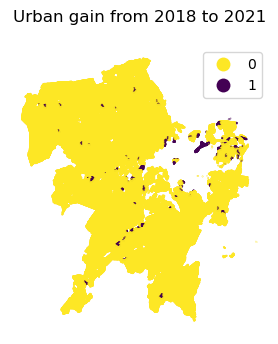

In [5]:
ax = geodata_validation_Y.plot(
    figsize=(20/4, 15/4),
    column = geodata_validation_Y["incremento_urbano"], 
    categorical = True, 
    cmap = "viridis_r", 
    legend = True, 
    markersize = 0.01
)
ax.set_axis_off();
plt.title("Urban gain from 2018 to 2021")
plt.plot()
plt.savefig("figures_variable_contribution_analysis/Fig03_b_gain_2018_2021_.png",dpi = 150, format = "png", bbox_inches = "tight")

In [8]:
c = "costo"
rank = np.array(geodata_train_X[c])
groundtruth = np.array(geodata_train_Y["incremento_urbano"])

T1 = toc.compute(rank, groundtruth)


Graficando mapa: pendiente
new toc comp


<Figure size 640x480 with 0 Axes>

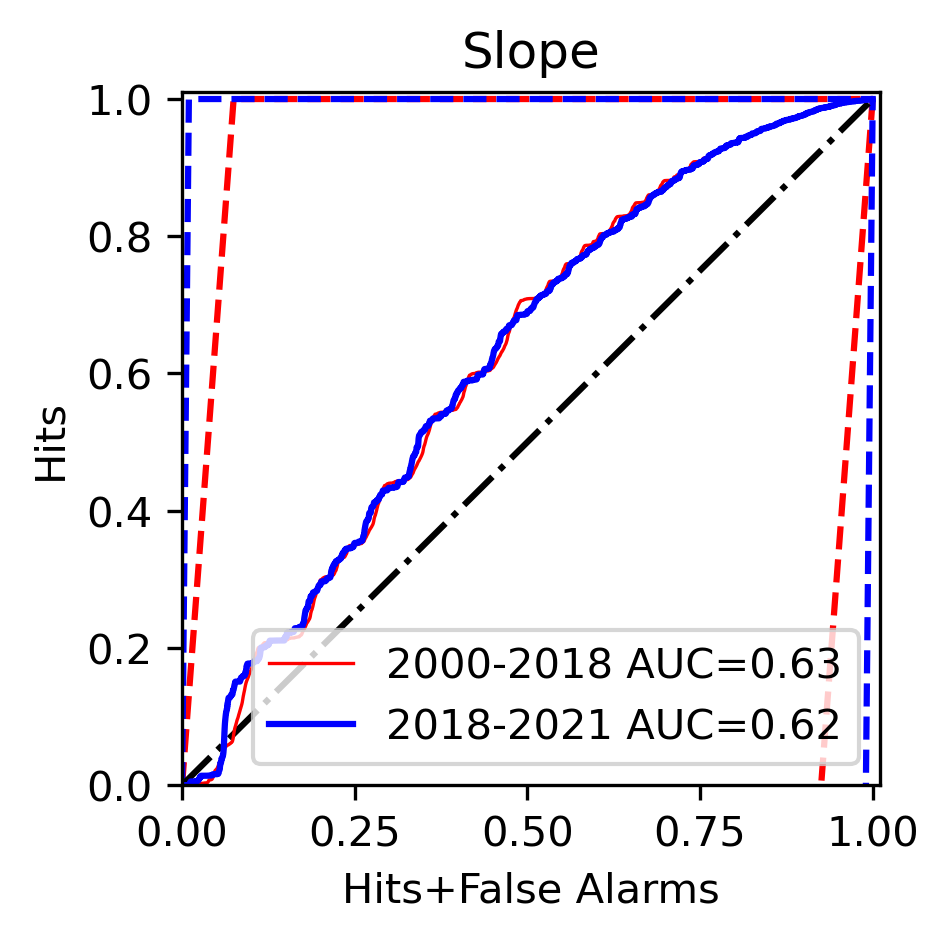

Graficando mapa: dist_anps
new toc comp


<Figure size 640x480 with 0 Axes>

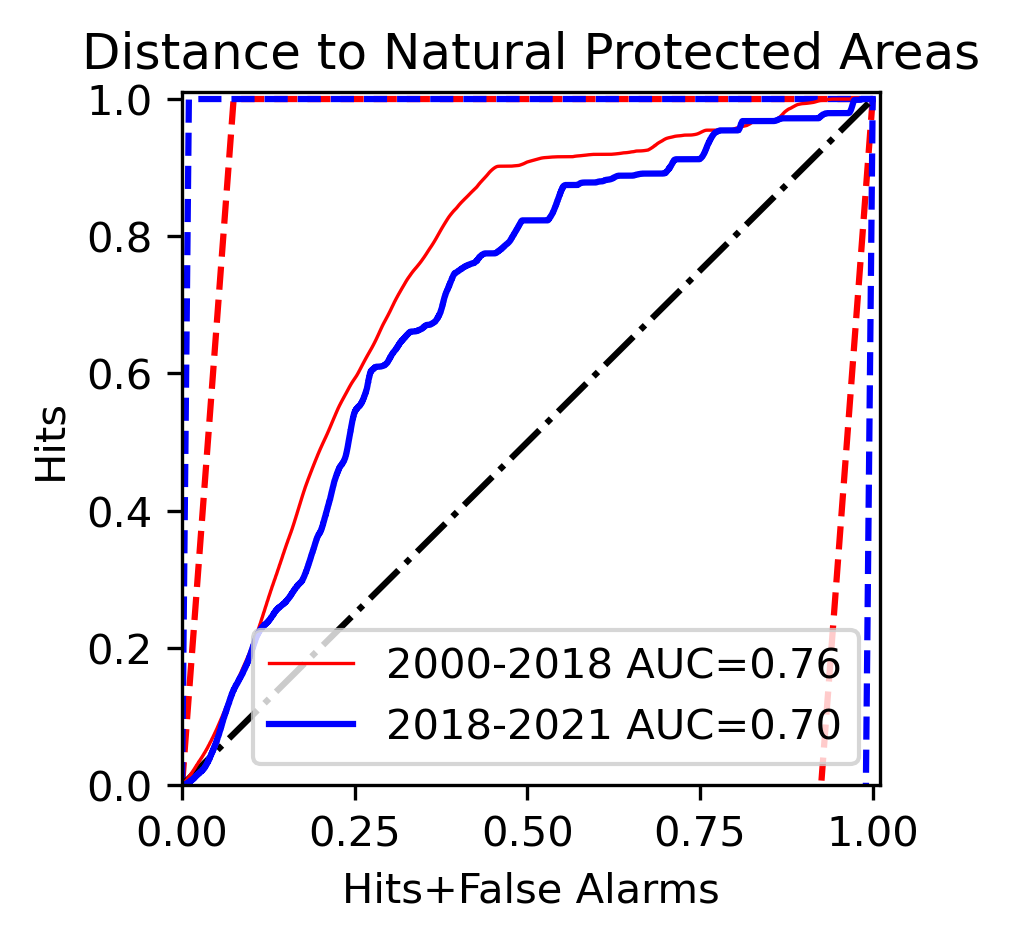

Graficando mapa: dist_agua
new toc comp


<Figure size 640x480 with 0 Axes>

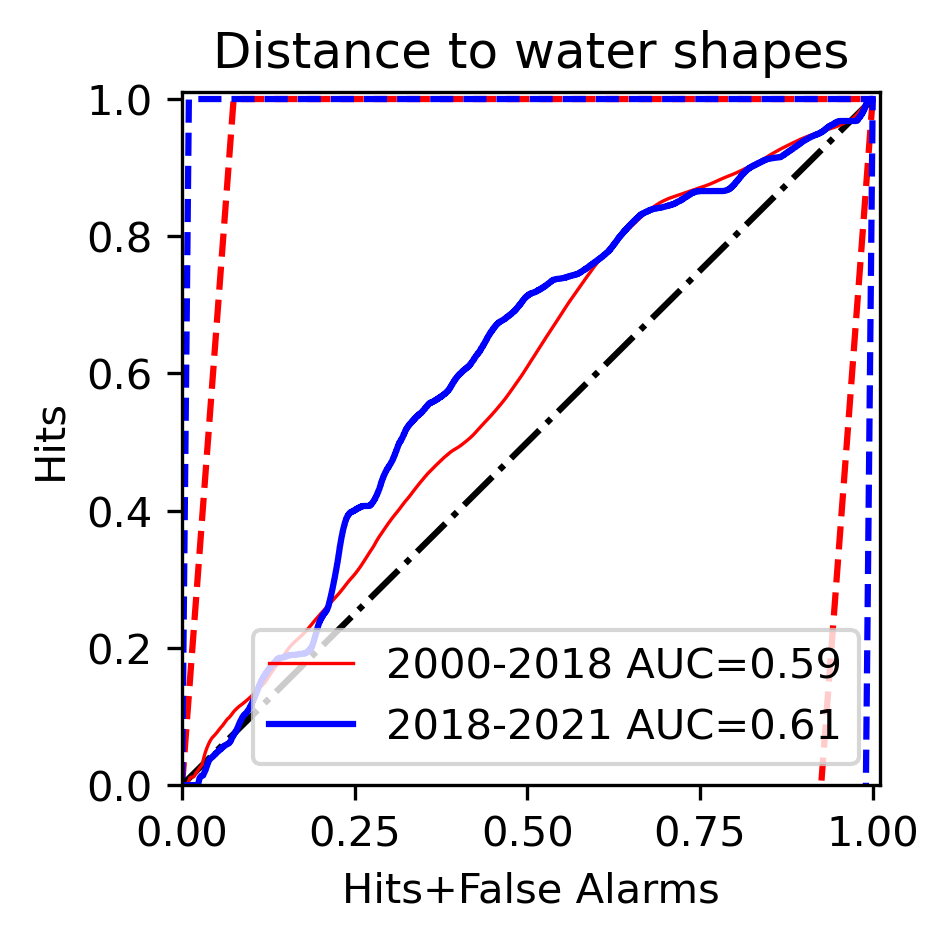

Graficando mapa: dist_vegetacion
new toc comp


<Figure size 640x480 with 0 Axes>

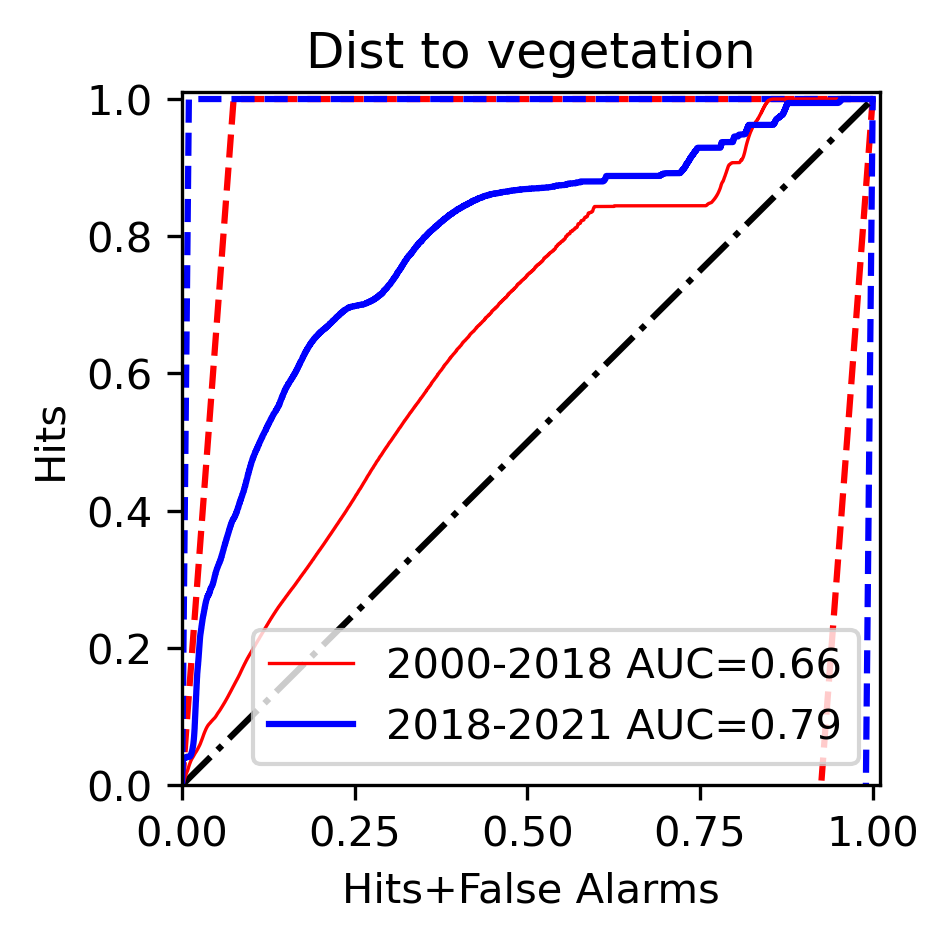

Graficando mapa: dist_urbano
new toc comp


<Figure size 640x480 with 0 Axes>

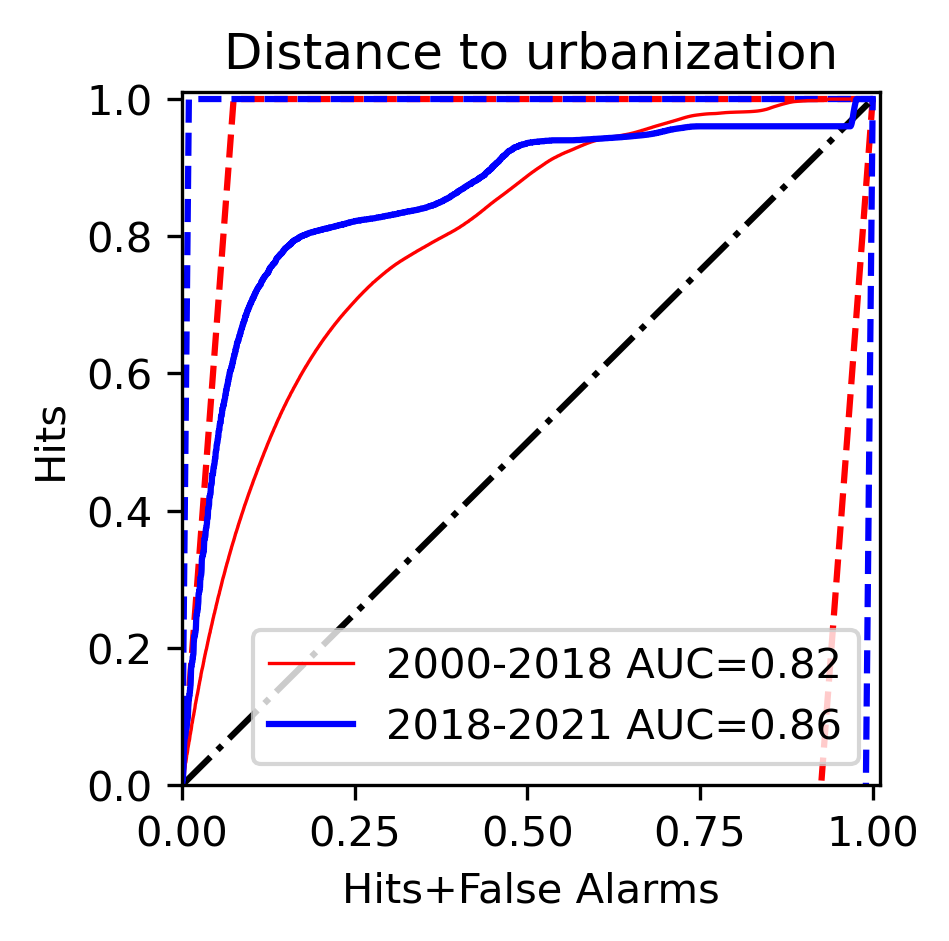

Graficando mapa: dist_centro
new toc comp


<Figure size 640x480 with 0 Axes>

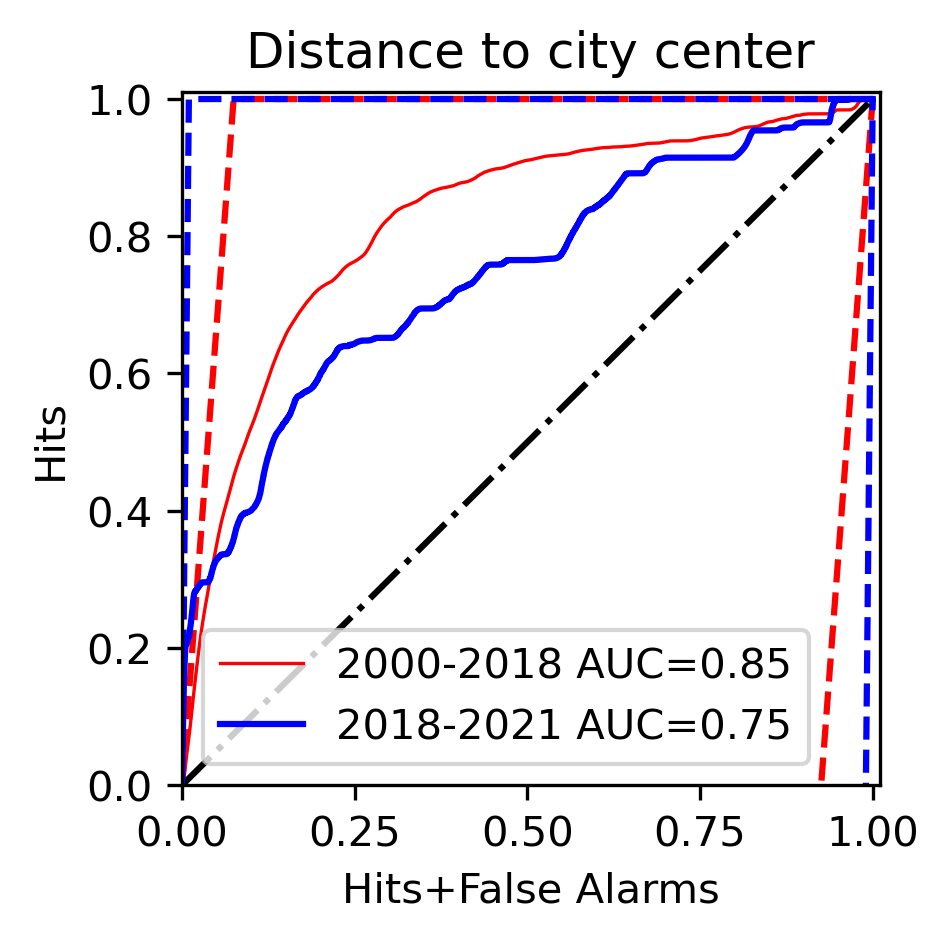

Graficando mapa: dist_carreteras
new toc comp


<Figure size 640x480 with 0 Axes>

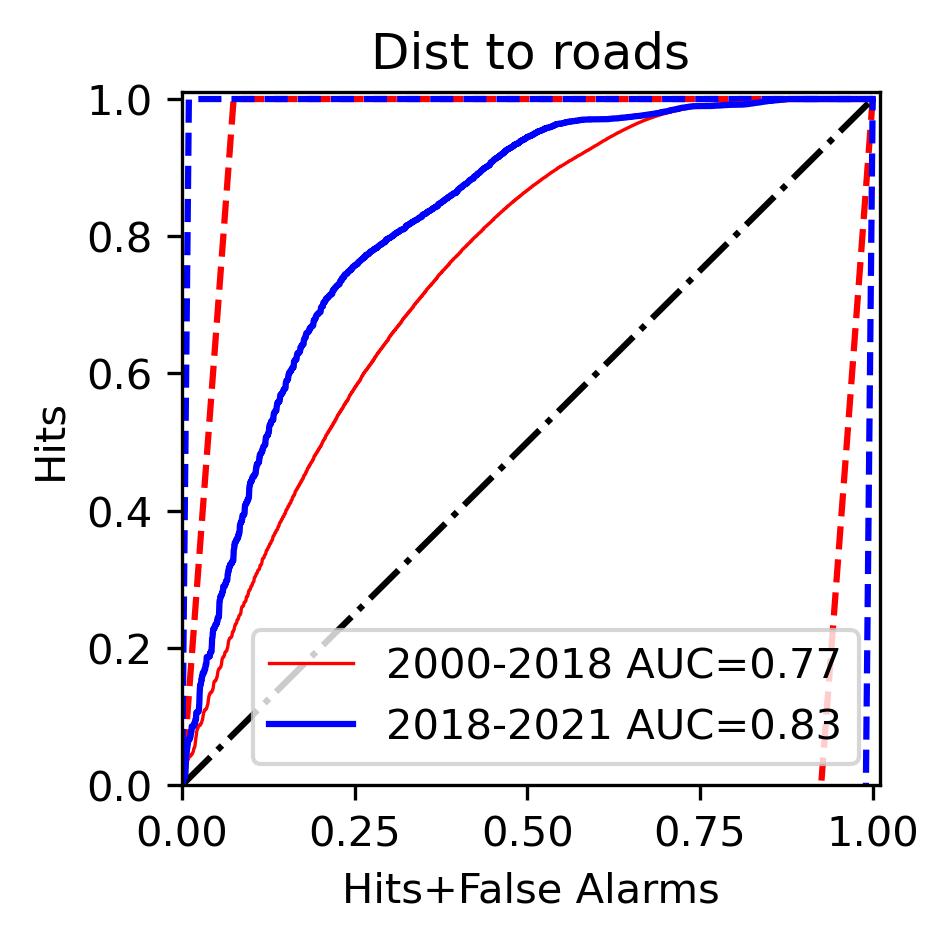

Graficando mapa: costo
new toc comp


<Figure size 640x480 with 0 Axes>

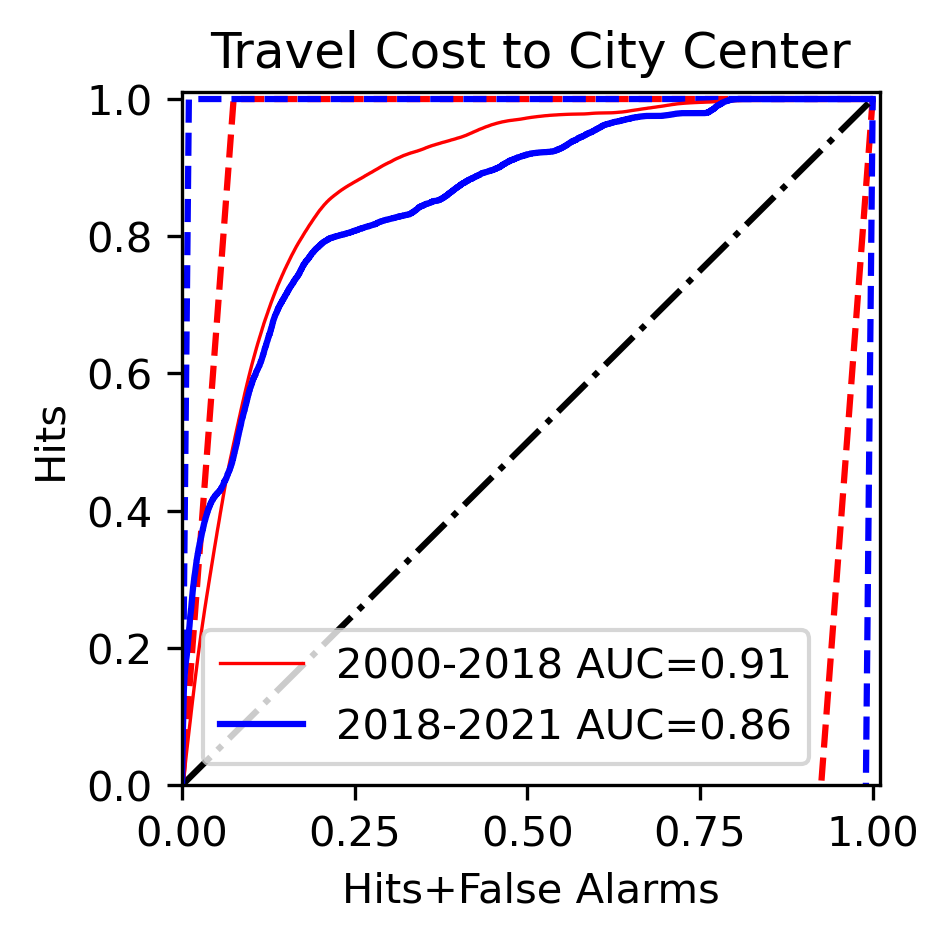

In [22]:
#english labels
cn = ["Slope", "Distance to Natural Protected Areas", "Distance to water shapes", "Dist to vegetation", "Distance to urbanization", "Distance to city center", "Dist to roads", "Travel Cost to City Center"]

prefix = "tocs_"
    
for i,c in enumerate(geodata_train_X.columns[3: -1]):
    
    print("Graficando mapa:", c)
    
    invers = 1
    
    if i == 2 or i == 3:
        
        invers = -1
        
    rank = invers*geodata_train_X[c]
        
    groundTruth = geodata_train_Y['incremento_urbano']

    T1 = toc.compute(rank, groundTruth)

    rank = invers*geodata_validation_X[c]

    groundTruth = geodata_validation_Y['incremento_urbano']

    T2 = toc.compute(rank, groundTruth)

    toc.plotComp(T1, T2, title = cn[i])